In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dropout, Dense, Activation
import datetime

In [87]:
data = pd.read_csv('bitcoin.csv',thousands=',')
data.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Mar 16, 2020",5385.23,5385.23,4575.36,5014.48,45368026430,91633478850
1,"Mar 15, 2020",5201.07,5836.65,5169.28,5392.31,33997889639,98530059890
2,"Mar 14, 2020",5573.08,5625.23,5125.07,5200.37,36154506008,95014981944
3,"Mar 13, 2020",5017.83,5838.11,4106.98,5563.71,74156772075,101644613038
4,"Mar 12, 2020",7913.62,7929.12,4860.35,4970.79,53980357243,90804613601


In [92]:
df= data[::-1]

In [93]:
high_prices = df['High'].values
low_prices = df['Low'].values
mid_prices = (high_prices + low_prices) /2

In [94]:
seq_len = 50
sequence_length = seq_len +1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index+sequence_length])

In [95]:
normalize=[]
for window in result:
    normalize_win = [((float(p) / float(window[0]))-1) for p in window]
    normalize.append(normalize_win)
    
result = np.array(normalize)

In [96]:
row = int(round(result.shape[0]*0.9))
train = result[:row, :]
np.random.shuffle(train)

In [97]:
x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = train[:,-1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = result[row:,-1]

In [98]:
x_train.shape, x_test.shape

((2217, 50, 1), (246, 50, 1))

In [99]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),
         batch_size=10, epochs=20)

Train on 2217 samples, validate on 246 samples
Epoch 1/20
2217/2217 [==============================] - 8s 4ms/step - loss: 0.0744 - val_loss: 0.0044
Epoch 2/20
2217/2217 [==============================] - 7s 3ms/step - loss: 0.0297 - val_loss: 0.0037
Epoch 3/20
2217/2217 [==============================] - 11s 5ms/step - loss: 0.0264 - val_loss: 0.0033
Epoch 4/20
2217/2217 [==============================] - 10s 4ms/step - loss: 0.0201 - val_loss: 0.0029
Epoch 5/20
2217/2217 [==============================] - 10s 4ms/step - loss: 0.0181 - val_loss: 0.0028
Epoch 6/20
2217/2217 [==============================] - 10s 4ms/step - loss: 0.0178 - val_loss: 0.0024
Epoch 7/20
2217/2217 [==============================] - 9s 4ms/step - loss: 0.0153 - val_loss: 0.0024
Epoch 8/20
2217/2217 [==============================] - 9s 4ms/step - loss: 0.0158 - val_loss: 0.0025
Epoch 9/20
2217/2217 [==============================] - 10s 4ms/step - loss: 0.0109 - val_loss: 0.0021
Epoch 10/20
2217/2217 [=======

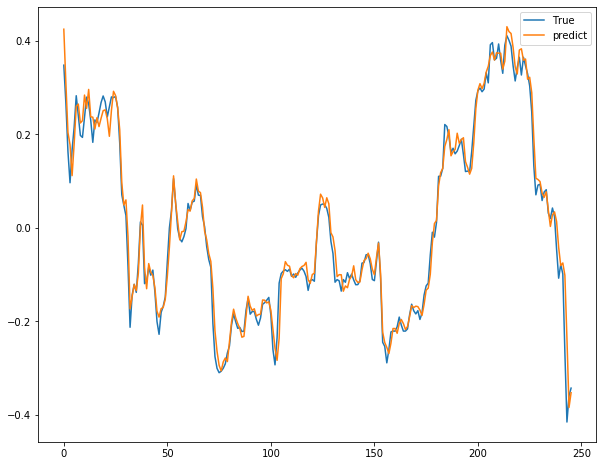

In [107]:
pred=model.predict(x_test)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='predict')
ax.legend()